# House Prices: Advanced Regression Techniques

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


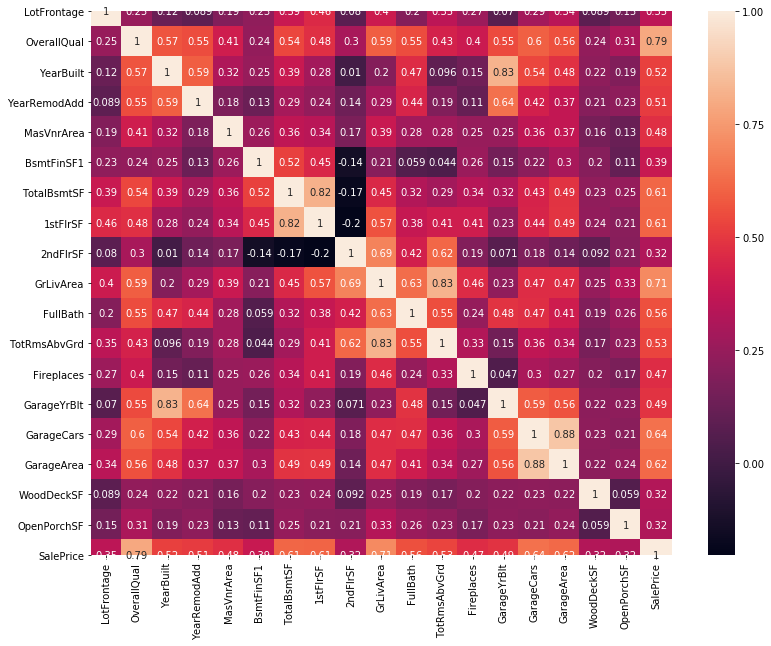

In [4]:
#load data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()
corr=train.corr()
top_corr = corr.index[abs(corr["SalePrice"])>=0.3]
print(top_corr)
# heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(train[top_corr].corr(),annot=True)
# split y_label
train_y_label = train['SalePrice'] # target 값을 미리 분리하였음.
train.drop(['SalePrice'], axis=1, inplace=True)
train.head()
boston = pd.concat((train, test), axis=0) #train데이터와 test데아터를 합친후 동일한 feature engineering진행




In [5]:
boston_corr=boston[['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF']]
boston_corr_obj = boston_corr.select_dtypes(include='object')	# 카테고리형
boston_corr_num = boston_corr.select_dtypes(exclude='object')	# 수치형
print('Object type columns:\n',boston_corr_obj.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_corr_num.columns)
#카테고리형에 해당하는 열이 없기때문에 one-hot encoding은 할 필요가 없다



boston_corr=boston_corr.fillna(boston_corr.mean())   #NA값을 각 컬럼의 평균값으로 대체
len_train = len(train)
len_test = len(test)
train_df=boston_corr[:len_train]
test_df=boston_corr[len_train:]
train_df['SalePrice']=train_y_label
model=smf.ols(formula='SalePrice~OverallQual',data=train_df)
result=model.fit()
result.summary()

from sklearn.model_selection import train_test_split

X_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))






Object type columns:
 Index([], dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')
X_train :  1168
X_val :  292
X_test : 1459


C:\Users\82102\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## GridSearchCV
교차 검증과 하이퍼 파라미터 튜닝을 한 번에 할 수 있다.

하이퍼 파라미터 튜닝은 머신러닝에서 필수적인 요소이다. 그 하이퍼 파라미터에 따라서 교차 검증을 수행하여 어떤 결과가 나오는지, 어떨 때 가장 좋은 결과가 나오는지 등을 볼 수 있다. 그래서 gridsearch는 필수적이다.

대신에 하이퍼 파라미터의 조합만큼 테스트하므로 시간이 더 오래 걸리는 것에 유념해야한다.

GridSearchCV의 파라미터는 아래와 같다.

-estimator : 모델 <br>
-param_grid : key : list 구조를 갖는 딕셔너리. estimator 튜닝에 사용하는 파라미터 값.<br>
-scoring : 평가 방법<br>
-cv : 학습/테스트 세트 개수<br>

In [12]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb   #xgboost: kaggle로 유명해진 머신러닝 기법

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           
                           n_jobs=-1)
grid_search.fit(X_train,y_train)     

print('최적 하이퍼 파라미터:',grid_search.best_params_)
print('최적 예측 정확도:',grid_search.best_score_)

C:\Users\82102\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:00:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적 하이퍼 파라미터: {'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 550}
최적 예측 정확도: 0.8626061300316203


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
pred_val = grid_search.predict(X_val)

print('train mae score: ', mean_absolute_error(y_train, pred_train))
print('val mae score:', mean_absolute_error(y_val, pred_val))

train mae score:  6492.529684824486
val mae score: 19172.66130672089


In [19]:
test_y_pred = grid_search.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Id'] = test_df.Id
pred_df['SalePrice'] = test_y_pred

